# Import required Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
%matplotlib inline

In [60]:
df_train = pd.read_csv("C:\\Users\\Rahul\\Downloads\\Adult census income dataset\\adult-data.csv", header = None)
df_test = pd.read_csv("C:\\Users\\Rahul\\Downloads\\Adult census income dataset\\adult-test.csv", header = None, skiprows = 1)

In [61]:
df_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,wrk_hrs_per_week,native_country,income
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [62]:
df_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# Data set Information

# Merge test and train data set to perform EDA

In [5]:
df = pd.concat([df_train,df_test])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,wrk_hrs_per_week,native_country,income
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [6]:
df1 = df.copy()
df = df.sample(n=10000)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
12752,40,Private,111483,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7298,0,40,United-States,>50K
11068,21,Private,290504,Some-college,10,Never-married,Other-service,Unmarried,White,Male,0,0,40,United-States,<=50K
8743,50,Private,108435,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,60,United-States,>50K
396,44,Private,115562,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,<=50K
13393,54,Private,52724,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


# 0.1 EDA

In [8]:
# Rename the columns as per given description

In [9]:
rename_columns = {0 : 'age', 
                  1 : 'workclass', 
                  2 : 'fnlwgt',
                  3 : 'education',
                  4 : 'education-num',
                  5 : 'marital-status', 
                  6 : 'occupation',
                  7 : 'relationship', 
                  8 : 'race', 
                  9 : 'sex', 
                  10 :'capital-gain',
                  11 : 'capital-loss', 
                  12 : 'hours-per-week',
                  13 : 'native-country', 
                  14 : 'class'}
df.rename(columns = rename_columns, inplace = True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
12752,40,Private,111483,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7298,0,40,United-States,>50K
11068,21,Private,290504,Some-college,10,Never-married,Other-service,Unmarried,White,Male,0,0,40,United-States,<=50K
8743,50,Private,108435,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,60,United-States,>50K
396,44,Private,115562,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,<=50K
13393,54,Private,52724,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6957,57,Private,197994,HS-grad,9,Never-married,Other-service,Other-relative,Black,Female,0,0,32,United-States,<=50K
1019,22,Private,122346,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
32,24,Self-emp-not-inc,188274,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,50,United-States,<=50K
4343,33,Private,236379,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,>50K


In [10]:
# Information about the dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 12752 to 5234
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  object
 1   workclass       10000 non-null  object
 2   fnlwgt          10000 non-null  object
 3   education       10000 non-null  object
 4   education-num   10000 non-null  object
 5   marital-status  10000 non-null  object
 6   occupation      10000 non-null  object
 7   relationship    10000 non-null  object
 8   race            10000 non-null  object
 9   sex             10000 non-null  object
 10  capital-gain    10000 non-null  object
 11  capital-loss    10000 non-null  object
 12  hours-per-week  10000 non-null  object
 13  native-country  10000 non-null  object
 14  class           10000 non-null  object
dtypes: object(15)
memory usage: 1.2+ MB


In [12]:
# All the columns in the dataset

In [13]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [14]:
# Check unique values in each column

In [15]:
for i in df.columns:
    print("--------------------------------------------------------------------------------")
    print(f"{i} : {df[i].unique()}")
    print("--------------------------------------------------------------------------------")

--------------------------------------------------------------------------------
age : ['40' 21 '50' '44' 54 '56' '19' '37' '38' '51' 37 42 '34' '43' 40 '55' 49
 '33' '68' '36' '42' '39' 32 35 '22' '29' '23' 27 68 '25' 53 '52' '35'
 '30' '21' 61 '49' 39 '26' 24 '58' '32' '61' 43 '27' '66' 47 '62' 62 25 36
 23 18 '57' 56 65 71 17 48 28 30 '69' 29 '45' 64 59 '28' '41' 33 '46' 51
 75 19 22 '65' 31 67 44 '72' '20' 45 '17' 55 '59' '31' 52 '60' '67' '18'
 '63' '77' '24' 73 20 '53' 41 '48' 46 '47' '71' 60 '54' '70' '76' '64' 26
 34 58 50 '74' '73' 66 57 63 '90' 77 38 '82' '75' '88' 78 74 '79' '78' 72
 '81' 70 79 '80' 76 69 84 81 90 'age' '83' 80 88 '84' 87]
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
workclass : [' Private' ' Self-emp-not-inc' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked' 'workclass']
----------------------------

In [16]:
# • There is extra space in column name as well as in data
# • There is ’?’ as impurity present in the data


# Replace ’?’ with blank in the class feature


In [17]:
df['class'] = df['class'].apply(lambda x: x.replace('-', ''))

# Remove extra space fro the column name

In [18]:
df.columns = df.columns.str.strip()
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [19]:
# Remove extra space from the data

In [20]:
df = df.applymap(lambda x: " ".join(x.split()) if isinstance(x, str) else x)

C:\Users\Rahul\AppData\Local\Temp\ipykernel_6180\2044337457.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: " ".join(x.split()) if isinstance(x, str) else x)


In [21]:
# Replace ’?’ with most mode value

In [22]:
for impure_col in ["workclass", "native-country", "occupation"]:
    frequent_value = df[impure_col].mode()[0]
    df[impure_col] = df[impure_col].replace(['?'], frequent_value)

In [23]:
# Check whether ’?’ is present or not in the dataset

In [24]:
df[(df['workclass'] == '?') | (df['native-country'] == '?') | (df['occupation']== '?')].sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: object

In [25]:
# Check null values in the dataset

In [26]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [27]:
# Check duplicate values in the dataset

In [28]:
df.duplicated().sum()

3

In [29]:
# Drop duplicates values from the dataset

In [30]:
df.drop_duplicates(inplace=True)

In [31]:
# Check duplicates after the deletion

In [32]:
df.duplicated().sum()

0

In [33]:
# Categorical Features

In [34]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes== 'O']
categorical_features

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'class']

In [35]:
# Numerical Features

In [36]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes !='O']
numerical_features

[]

In [37]:
# 0.2 Handling of Categorical Features

In [38]:
df[categorical_features].nunique()

age                140
workclass            9
fnlwgt            9061
education           17
education-num       33
marital-status       8
occupation          14
relationship         7
race                 6
sex                  3
capital-gain       159
capital-loss       107
hours-per-week     150
native-country      41
class                3
dtype: int64

In [39]:
# Check unique values in each category

In [40]:
for i in categorical_features:
    print(f"{i} : {df[i].unique()}")

age : ['40' 21 '50' '44' 54 '56' '19' '37' '38' '51' 37 42 '34' '43' 40 '55' 49
 '33' '68' '36' '42' '39' 32 35 '22' '29' '23' 27 68 '25' 53 '52' '35'
 '30' '21' 61 '49' 39 '26' 24 '58' '32' '61' 43 '27' '66' 47 '62' 62 25 36
 23 18 '57' 56 65 71 17 48 28 30 '69' 29 '45' 64 59 '28' '41' 33 '46' 51
 75 19 22 '65' 31 67 44 '72' '20' 45 '17' 55 '59' '31' 52 '60' '67' '18'
 '63' '77' '24' 73 20 '53' 41 '48' 46 '47' '71' 60 '54' '70' '76' '64' 26
 34 58 50 '74' '73' 66 57 63 '90' 77 38 '82' '75' '88' 78 74 '79' '78' 72
 '81' 70 79 '80' 76 69 84 81 90 'age' '83' 80 88 '84' 87]
workclass : ['Private' 'Self-emp-not-inc' 'State-gov' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked' 'workclass']
fnlwgt : ['111483' 290504 '108435' ... 188274 236379 80933]
education : ['Bachelors' 'Some-college' 'Masters' 'HS-grad' 'Assoc-voc' '1st-4th'
 '10th' 'Assoc-acdm' '5th-6th' 'Doctorate' 'Preschool' '12th' '7th-8th'
 '11th' '9th' 'Prof-school' 'education']
education-num : ['13' 10 '14'

In [41]:
# Reduce number of catgeory in marital-status

In [42]:
df['marital-status'] = df['marital-status'].map({'Never-married' : 'Single',
                                                 'Married-civ-spouse' : 'Married',
                                                 'Married-spouse-absent' : 'Married',
                                                 'Married-AF-spouse' :'Married', 
                                                 'Divorced' : 'Divorced',
                                                 'Separated' : 'Separated', 
                                                 'Widowed' : 'Widowed'})

In [43]:
# Reduce number of catgeory in workclass

In [44]:
df['workclass'] = df['workclass'].map({'State-gov' : 'Government',
                                       'Self-emp-not-inc' : 'Self_Employed',
                                       'Private' : 'Private', 
                                       'Federal-gov' : 'Government', 
                                       'Local-gov' :'Government',
                                       'Self-emp-inc' : 'Self_Emp'})

In [45]:
df['sex'].unique()

array(['Male', 'Female', 'sex'], dtype=object)

In [46]:
# Map Male to 1 and Female to 0

In [47]:
df['sex'] = df['sex'].map({'Male' : 1, 'Female' : 0})

In [48]:
# Map ”>50K” to 1 and ”<=50K” to 0

In [49]:
df['class'] = df['class'].map({'>50K' : 1, '<=50K' : 0})

In [50]:
# Check Correlation of numerical features

In [51]:
# 0.3 Graphical Analysis

In [52]:
df_numerical_features = df[numerical_features]

In [53]:
# 0.3.1 Numerical Features Analysis
# Distplot

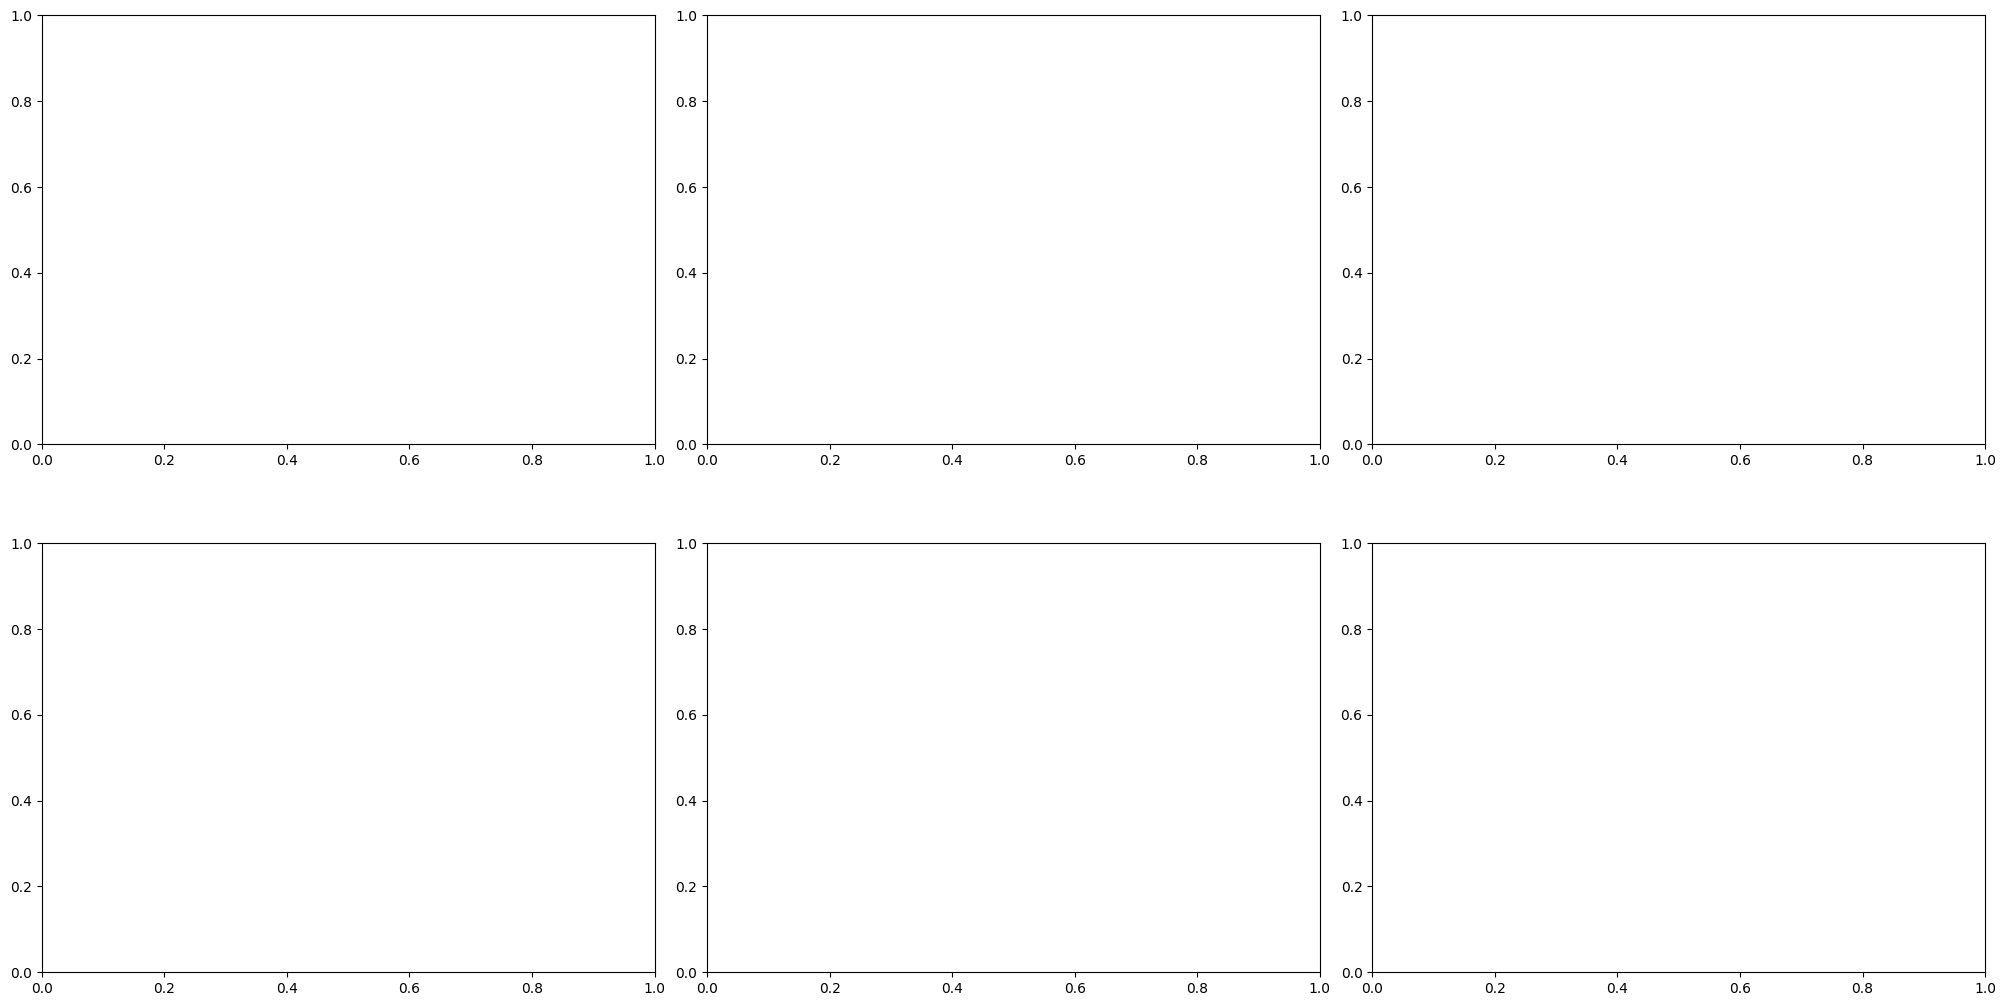

In [54]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df_numerical_features.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [55]:
# 0.3.2 Categorical Features Analysis

In [56]:
df_categorical_features = df[categorical_features]

In [57]:
# Barplot

TypeError: 'value' must be an instance of str or bytes, not a int

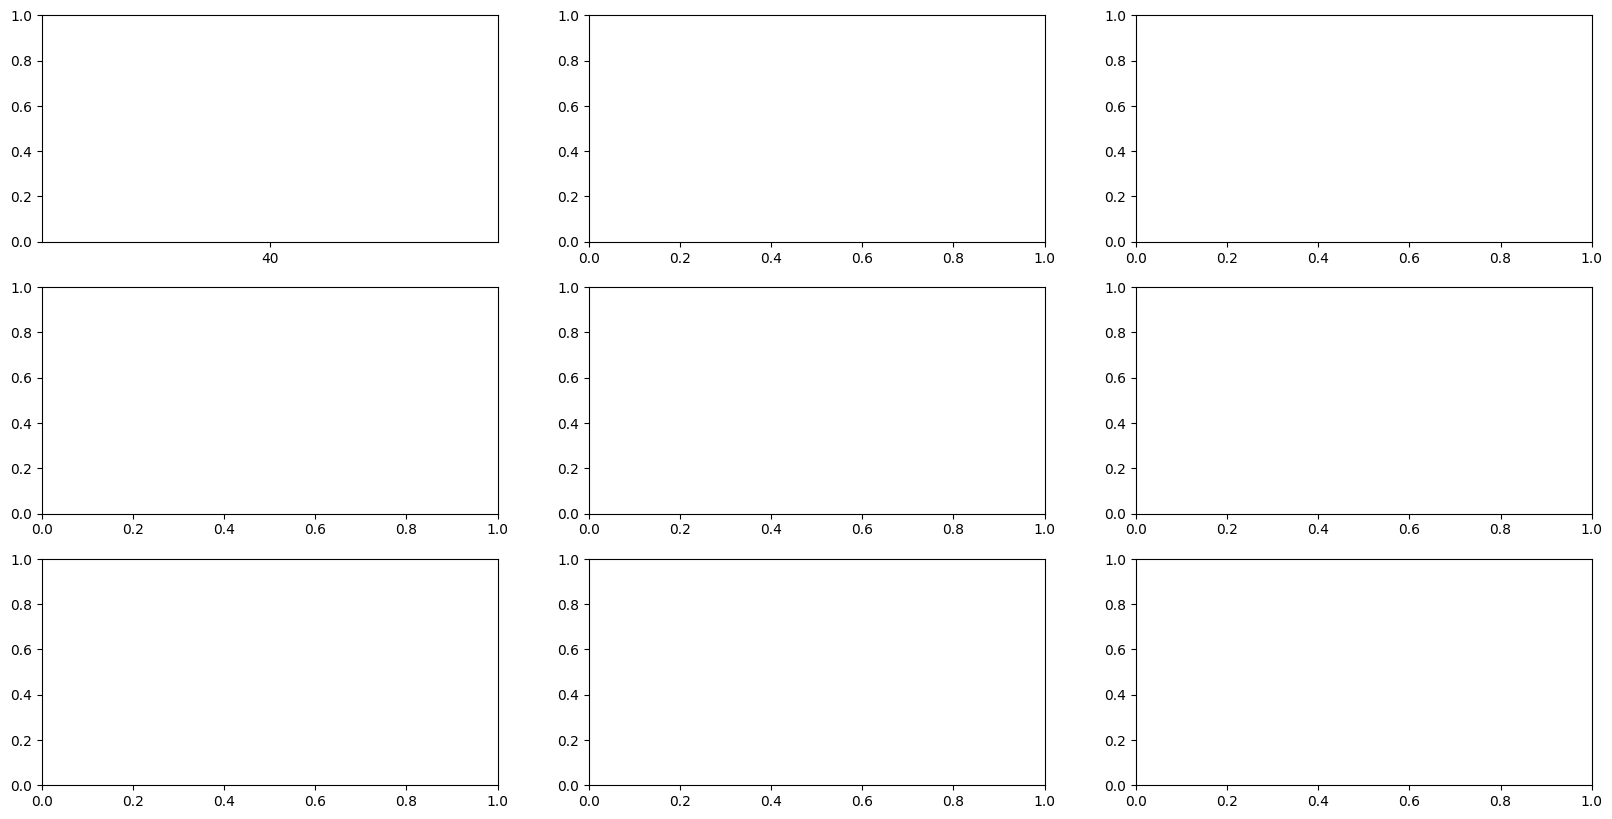

In [58]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df_categorical_features.items():
    sns.barplot(y = df['age'], x = df[col], data = df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [ ]:
sns.pairplot(df)

In [ ]:
# 0.4 Statistical Analysis

In [ ]:
df.describe().T

In [ ]:
sns.heatmap(data = df.corr(), annot = True)

In [ ]:
# 0.5 Encoding
# Frequency Encoding

In [ ]:
df.nunique()

In [ ]:
for col in ['workclass', 'marital-status', 
            'occupation', 'relationship',
            'race', 'native-country']:df['workclass'] = df['workclass'].map(df.groupby("workclass").size()/
,
→len(df)).round(2)
df[col] = df[col].map(df.groupby(col).size()/len(df)).round(2)

In [ ]:
# Drop ”education” column because we have one more columns as ”eduction-num” which
# is encoded to ”eductaion” column

In [ ]:
df.drop('education', axis = 1, inplace = True)

In [ ]:
# X = df.iloc[ : , :-1]
# y = df.iloc[ : , -1]

In [ ]:
 # X.shape

In [ ]:
# y.shape

In [ ]:
# 0.6 Save Preprocess Model Data Using Pickle

In [ ]:
# preprocess_model = [X_train,y_train,X_test,y_test]
preprocess_model = [df]

In [ ]:
import pickle

In [ ]:
pickle.dump(preprocess_model,␣
,
→open('Census_Income_Classification_Preprocess_Model.pkl','wb'))

In [ ]:
preprocess_model = pickle.
,
→load(open('Census_Income_Classification_Preprocess_Model.pkl','rb'))

In [ ]:
# Note * We have successfully stored our scaled data into pickel file so we can use it further in other
# file by just importing it

In [ ]:
# 0.7 Save Data into MongoDb